<a href="https://colab.research.google.com/github/ayanbabusona/Intro_to_ML_with_python/blob/main/BioPython_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is BioPython??**

*BioPython is a set of free Python modules for working with genomic data, as well as other tools that are commonly used for sequence analysis, such as BLAST and Clustalw. Or as the BioPython developers put it.*

*Basically, the goal of Biopython is to make it as easy as possible to use Python for bioinformatics by creating high-quality, reusable modules and classes. Biopython features include parsers for various Bioinformatics file formats (BLAST, Clustalw, FASTA, Genbank,...), access to online services (NCBI, Expasy,...), interfaces to common and not-so-common programs (Clustalw, DSSP, MSMS...), a standard sequence class, various clustering modules, a KD tree data structure etc. and even documentation.*

*In terms of getting help, BioPython has a very large cookbook full of examples, and as always, Google is your best friend. This very brief tutorial covers some of the basic bioinformatics tools that will be useful throughout the course.*

# **BioPython and Support from External Tools**

*Biopython includes support for interfacing with or parsing the output from a number of third party command line tools. These tools are not required to install Biopython, but may be of interest. This includes:*



*   NCBI Standalone BLAST, which can used with the Bio.Blast module and parsed with the Bio.SearchIO module.
*   EMBOSS tools, which can be invoked using the Bio.Emboss module. The Bio.AlignIO module can also parse some alignment formats output by the EMBOSS suite.
*   ClustalW, which can be parsed using Bio.AlignIO and invoked using the Bio.Align.Applications module.
*   SIMCOAL2 and FDist tools for population genetics can be used via the Bio.PopGen module.
*   Bill Pearson’s FASTA tools output can be parsed using the Bio.AlignIO and Bio.SearchIO module.
*   Wise2 includes the useful tool dnal.







In [3]:
!pip3 install biopython
import Bio as bio
print()
print("BioPython Version: "+str(bio.__version__))


BioPython Version: 1.79


# **Basic Sequence Tools**

*Sequences in bioinformatics can simply be interpreted as being strings. BioPython represents sequences with the Seq object, which contains properties beyond that of a simple string object. For example, the Alphabet of the sequence can be specified (and also obtained). More about the Seq class can be found on BioPython's API. It is possible to convert the sequence to a string using Python's built in str command (e.g., str(my_sequence)). Some useful methods of Seq object include:*


*   find: Find method, like that of a python string
*   startswith: Does the Seq start with the given prefix?
*   endswith: Does the Seq end with the given suffix?
*   complement: Returns the complement sequence.
*   reverse_complement: Returns the reverse complement sequence.
*   transcribe: Returns the RNA sequence from a DNA sequence.
*   back_transcribe: Returns the DNA sequence from a RNA sequence.
*   translate: Turns a nucleotide sequence into a protein sequence.





In [4]:
from Bio.Seq import Seq 

# working with sequences 
my_seq = Seq("AGTACACTGGT") 
print("sequence: ", my_seq) 
print("complement: " + my_seq.complement())
print("reverse complement: " + my_seq.reverse_complement())
print("transcribe: " + my_seq.transcribe()) # my_rna = my_seq.transcribe()
print("my_seq[2:4]: " + my_seq[2:4]) #slicing
print("back transcribe: ", my_seq.back_transcribe())
print("translate: ", my_seq.translate())

sequence:  AGTACACTGGT
complement: TCATGTGACCA
reverse complement: ACCAGTGTACT
transcribe: AGUACACUGGU
my_seq[2:4]: TA
back transcribe:  AGTACACTGGT
translate:  STL


/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


*In the above example, we converted a simple string in Python to a sequence object, which allowed used to directly call built in functions of the Seq class. We could call these methods directly as well (e.g., transcribe("AGTACACTGGT")). Also, we did not specify an Alphabet. BioPython provides generic alphabets in Bio.Alphabet. Specifying an alphabet can be useful for catching errors in a sequence, or specifying a particular type of sequence.*

In [8]:
# New style
from Bio import SeqIO
#from Bio.Alphabet import generic_rna,generic_dna
messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG") 
messenger_rna.translate()

Seq('MAIVMGR*KGAR*')

GC content is a commonly used statistic to quantify a sequence. It is measured as the percentage of nucleotides from either guanine or cytosine. More formally, the GC-content of a sequence is given by: $$ \textrm{GC-content} = 100\times\frac{N_G + N_C}{N_G + N_C + N_A + N_T} $$ where $N_G$, $N_C$, $N_A$, and $N_T$ are the counts for the nucleotides G, C, A and T, respectively. BioPython allows you to perform this calcuation using either GC or GC123. Note that GC simply calculates the GC-content; however, CG123 calculates total GC-content plus first, second and third positions' GC-content. Let us also take a moment to examine how to create plots with IPython and Python. If you're using the Python interpreter than you must use from matplotlib.pylab import *

(52.97092288242731, 51.89393939393939, 57.57575757575758, 49.42965779467681)
52.97092288242731


Text(0.5, 1.0, 'GC-skew')

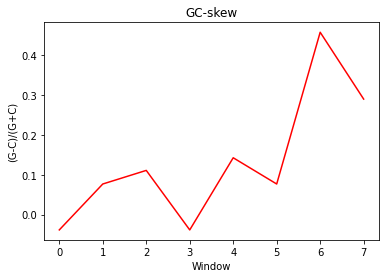

In [10]:
from Bio.Seq import Seq 
from Bio.SeqUtils import GC123,GC,GC_skew
from matplotlib.pylab import *
seq = "ataccaggctgaggcccattaatgatgcaatttgctgggcttctctattttctccgtgcttccatcctcttctccgtcggcggggagaagtgaaatgccgtggagatgggcggcggcggcggcgacggcggcgacgagaaagctcaccgggatctctcagtcgcgagtttcagtagcctttaccggccgtcttctctaccgctcgttcggaagcgactccagtgaaagccgcaagaggtcactgccacggggggtcgtatcgatcggggccatcagccttgctggaggtctcgtgctcagcgccgtcaacgacctcgccatcttcaatggatgcacaacgaaggcaattgagcatgctgctgacaaccctgctgttgtggaagcaattggagtgcctatagtcagaggaccgtggtatgatgcttctcttgaggtgggccatcgacggcggtctgtgtcatgcacattccctgtatctgggccacatgggtcaggatttctccagattaaggcaacccgagatggagaggatggtctgctttcgtttctgcggcatcacgactggaagatcctattgctggaggctcatcttgaagcaccatcagatgatgaggaccagagaaagctggttaaggtgaatcttgcaagcagtggccgtggggaagatggggatccagagagtggttaatcttttgtactgaattccatggtgagtggaagatcgtgtcatctgaatggactccaaatattaaatgacatggagatctagggaagcaaaaaaaaaaaaaaaa"
print(GC123(seq))
print(GC(seq))

plot(GC_skew(seq, window=100),c="r")
xlabel("Window")
ylabel("(G-C)/(G+C)")
title("GC-skew")

*We can also go directly from DNA to amino acids using the translate command.*

In [13]:
print("translate: " + Seq(seq).translate())
print() # my_rna = my_seq.transcribe()

translate: IPG*GPLMMQFAGLLYFLRASILFSVGGEK*NAVEMGGGGGDGGDEKAHRDLSVASFSSLYRPSSLPLVRKRLQ*KPQEVTATGGRIDRGHQPCWRSRAQRRQRPRHLQWMHNEGN*ACC*QPCCCGSNWSAYSQRTVV*CFS*GGPSTAVCVMHIPCIWATWVRISPD*GNPRWRGWSAFVSAASRLEDPIAGGSS*STIR**GPEKAG*GESCKQWPWGRWGSREWLIFCTEFHGEWKIVSSEWTPNIK*HGDLGKQKKKK



/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


# **Basic FileIO**

*Different tools in bioinformatics use different standards for containing thier data. For example, GenBank, Fasta, and Biom are all file formats used to storge biological data. BioPython contains several builtin modules for interfacing with theses different file formats using the SeqIO class. In this section, we examine converting between file formats as well as manipulating the variables in the SeqIO class.*

*Let us take a moment to talk about the SeqRecord object in BioPython. We learned that sequences in BioPython are stored in a a Seq object, which contained some handy functions such as translation. We can create a more detailed record that contains a seqence ID, name, the raw sequence, etc. Such a more detailed stucture can be found in the SeqRecord class. SeqRecord contains a sequence (as a Seq object) with identifiers (ID and name), description and optionally annotation and sub-features. The SeqIO system will only return SeqRecord objects.*

*SeqIO contains a parse function that can readily handle GenBank and Fasta formats. We have a fasta file in "/content" which contains 94 sequences, or records. We can read in the iterable set of sequence records into a dictionary with the key being the id and the value being the sequence. In code this translates to:*

In [20]:
from Bio import SeqIO

# we can parse the fasta file and read the sequences in by looping over 
# the iterator returned by SeqIO.parse()
sequences = {}  # empty dictionary 
for seq_record in SeqIO.parse("/content/ls_orchid.fasta", "fasta"):
    sequences[seq_record.id] = seq_record.seq

# an alternative way to do this can be done with one line of code
sequences2 = {s.id:s.seq for s in SeqIO.parse("/content/ls_orchid.fasta", "fasta")}

print(list(sequences2.keys())[0])
print(sequences2[list(sequences2.keys())[0]])  # print the first sequence

gi|2765658|emb|Z78533.1|CIZ78533
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC


*We can also read in Genbank files as well.*

In [25]:
# simple conversion from GB to a fasta file
records = SeqIO.parse("/content/ls_orchid.gbk", "genbank")
count = SeqIO.write(records, "/content/my_example.fasta", "fasta")

# read in the sequences from the GB file. note that this is nearly identical to when we 
# performed this task with the fasta file in the previous code block
sequences = {s.id:s.seq for s in SeqIO.parse("/content/ls_orchid.gbk", "genbank")}

record = SeqIO.read("/content/ls_orchid.gbk", 'gb')
print("locus = " + record.name)
print("definition = " + record.description)
print("version = " + record.id)
print("seq = " + record.seq)
print()

locus = Z78533
definition = C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
version = Z78533.1
seq = CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC



/usr/local/lib/python3.7/dist-packages/Bio/GenBank/Scanner.py:1219: BiopythonParserWarning: Premature end of file in sequence data
  "Premature end of file in sequence data", BiopythonParserWarning


In [26]:
%%bash 
cat /content/my_example.fasta | head -20

>Z78533.1 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAA
CGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGT
GACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCC
CGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCC
CAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAA
CGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTG
AATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCA
GGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCG
GCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCG
GCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTG
GCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCC
TTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGG
GGCACCCGCTGAGTTTACGC


# **Accessing the Entrez Database**

*We can also search....*

In [27]:
from Bio import Entrez 
from Bio.SeqRecord import SeqRecord

terms = ["cytochrome oxidase i AND viridiplantae[Organism] and 450:2000[Sequence Length]",
         "cytochrome oxidase i AND fungi[Organism] and 450:2000[Sequence Length]",
         "cytochrome oxidase i AND animalia[Organism] and 450:2000[Sequence Length]"
         ]
Entrez.email = "ayanbabusona@gmail.com"   # you should put your email in here!

In [29]:
top_records = []
for term in terms:  # I could do this in 1 line if I wanted to!
    handle = Entrez.esearch(db="nucleotide", term=term)
    top_records.append(Entrez.read(handle)["IdList"][0])

handle = Entrez.efetch(db="nucleotide", id=",".join(top_records), rettype="gb", retmode="xml")
genbank_records = Entrez.read(handle)
print("First Genbank record keys: " + str(genbank_records[0].keys()))
print()
print("First Genbank sequence (" + genbank_records[0]["GBSeq_primary-accession"] + "): " + genbank_records[0]["GBSeq_sequence"])

First Genbank record keys: dict_keys(['GBSeq_locus', 'GBSeq_length', 'GBSeq_strandedness', 'GBSeq_moltype', 'GBSeq_topology', 'GBSeq_division', 'GBSeq_update-date', 'GBSeq_create-date', 'GBSeq_definition', 'GBSeq_primary-accession', 'GBSeq_accession-version', 'GBSeq_other-seqids', 'GBSeq_source', 'GBSeq_organism', 'GBSeq_taxonomy', 'GBSeq_references', 'GBSeq_feature-table', 'GBSeq_sequence'])

First Genbank sequence (EU165029): cagtattaatacgcatggaactagcgcaaccaggtgatcaaattcttggtgggaatcatcagctttataatgtgttaatcacggctcacgcttttctcatgatattttttatggttatgccggcggtgatcggtggatttgggaattggttcgttccgattcttataggtgcacctgacatggcattcccgcgattaaataatatttccttttggttgttgccaccttcgctgctgctctcattaagctcagccctggtagaagtaggtggcggcactgggtggacggtatatccgcccctaagtggtattaccagtcattccgggggagctgttgatccagcaatttctagtctccatccatcaggcgtttcatccattttaggtgctatcaatttcataacgactatctttaacatgcgcgggcctggaatgactatgcatagattacctctctttgtgtggtccgttttagtgaccgcgttcccactcttattatcacttccagtacttgcgggggcaattaccatgttattaaccgatcgaaactttaatactaccttttccga

In [30]:
fasta_records = []
for record in genbank_records:
    seq_record = SeqRecord(Seq(record["GBSeq_sequence"]), id=record["GBSeq_primary-accession"], description=record["GBSeq_definition"])
    fasta_records.append(seq_record)

In [31]:
with open("/content/my_seqs.fa","w") as fasta_file:
    SeqIO.write(fasta_records, fasta_file, "fasta")

In [32]:
%%bash 
cat ../data/my_seqs.fa

cat: ../data/my_seqs.fa: No such file or directory


# **BLAST**

*BLAST can be run with BioPython either from using the command line tools -- provided they are installed -- or through the web. In this section, we use the qblast from the Bio.Blast.NCBIWWW module to call the online version of BLAST. Note that the results would be the same if we were to use the command line tools. As pointed out from the qblast documentation, there are three required arguments:*

*   *The first argument is the blast program to use for the search, as a lower case string. The options and descriptions of the programs are available at http://www.ncbi.nlm.nih.gov/BLAST/blast_program.shtml. Currently qblast only works with blastn, blastp, blastx, tblast and tblastx.*
*   *The second argument specifies the database in which to perform the search. Again, the options for this are available on the NCBI web pages at http://www.ncbi.nlm.nih.gov/BLAST/blast_databases.shtml.*
*   *The third argument is a string containing your query sequence. This can either be the sequence itself, the sequence in fasta format, or an identifier like a GI number.*

The default output format for qblast is XML; however, we shall use other methods in BioPython to convert the results in the XML file to a more interpretable and managable output.




In [33]:
from Bio.Blast import NCBIWWW, NCBIXML

E_VALUE_THRESH = 0.01
s_len = 100

# search against the nucleotide database (nt) using BLASTN, and you know the GI number 
result_handle = NCBIWWW.qblast("blastn", "nt", "8332116") # 449020131, 8332116
blast_records = NCBIXML.read(result_handle) 

for alignment in blast_records.alignments[:5]:
    for hsp in alignment.hsps: 
        if hsp.expect < E_VALUE_THRESH: 
            print("****Alignment****")
            print("sequence:", alignment.title) 
            print("length:", alignment.length) 
            print("e value:", hsp.expect)
            print(hsp.query[0:s_len] + "...")
            print(hsp.match[0:s_len] + "...")
            print(hsp.sbjct[0:s_len] + "...")

****Alignment****
sequence: gi|1219041180|ref|XM_021875076.1| PREDICTED: Chenopodium quinoa cold-regulated 413 plasma membrane protein 2-like (LOC110697660), mRNA
length: 1173
e value: 3.44122e-117
ACAGAAAATGGGGAGAGAAATGAAGTACTTGGCCATGAAAACTGATCAATTGGCCGTGGCTAATATGATCGATTCCGATATCAATGAGCTTAAAATGGCA...
|| ||||||||| |||| | |||| ||  |||| |||| | |||| ||| | |||| ||| ||| ||||| | ||||| ||||||||||| || || |  ...
ACCGAAAATGGGCAGAGGAGTGAATTATATGGCAATGACACCTGAGCAACTAGCCGCGGCCAATTTGATCAACTCCGACATCAATGAGCTCAAGATCGTT...
****Alignment****
sequence: gi|1226796956|ref|XM_021992092.1| PREDICTED: Spinacia oleracea cold-regulated 413 plasma membrane protein 2-like (LOC110787470), mRNA
length: 672
e value: 2.17165e-113
AAAATGGGGAGAGAAATGAAGTACTTGGCCATGAAAACTGATCAATTGGCCGTGGCTAATATGATCGATTCCGATATCAATGAGCTTAAAATGGCAACAA...
|||||||| |||  |||| | || ||||| |||||||| || ||||| |||| ||| ||| ||||||||||||||||||| ||||| || || ||    |...
AAAATGGGTAGACGAATGGATTATTTGGCGATGAAAACCGAGCAATTAGCCGCGGCCAATTTGATCGATTCCGATATCAACGAGCT

*Similarly, we can directly BLAST our sequence if we have it in the Python environment. BioPython is smart enough to pick up on how the third argument should be interpreted for BLASTing.*

In [34]:
seq = "ataccaggctgaggcccattaatgatgcaatttgctgggcttctctattttctccgtgcttccatcctcttctccgtcggcggggagaagtgaaatgccgtggagatgggcggcggcggcggcgacggcggcgacgagaaagctcaccgggatctctcagtcgcgagtttcagtagcctttaccggccgtcttctctaccgctcgttcggaagcgactccagtgaaagccgcaagaggtcactgccacggggggtcgtatcgatcggggccatcagccttgctggaggtctcgtgctcagcgccgtcaacgacctcgccatcttcaatggatgcacaacgaaggcaattgagcatgctgctgacaaccctgctgttgtggaagcaattggagtgcctatagtcagaggaccgtggtatgatgcttctcttgaggtgggccatcgacggcggtctgtgtcatgcacattccctgtatctgggccacatgggtcaggatttctccagattaaggcaacccgagatggagaggatggtctgctttcgtttctgcggcatcacgactggaagatcctattgctggaggctcatcttgaagcaccatcagatgatgaggaccagagaaagctggttaaggtgaatcttgcaagcagtggccgtggggaagatggggatccagagagtggttaatcttttgtactgaattccatggtgagtggaagatcgtgtcatctgaatggactccaaatattaaatgacatggagatctagggaagcaaaaaaaaaaaaaaaa "
result_handle = NCBIWWW.qblast("blastn", "nt", seq) 
blast_records = NCBIXML.read(result_handle) 

for alignment in blast_records.alignments[:5]:
    for hsp in alignment.hsps: 
        if hsp.expect < E_VALUE_THRESH: 
            print("****Alignment****")
            print("sequence:", alignment.title) 
            print("length:", alignment.length) 
            print("e value:", hsp.expect) 
            print(hsp.query[0:s_len] + "...") 
            print(hsp.match[0:s_len] + "...") 
            print(hsp.sbjct[0:s_len] + "...")

****Alignment****
sequence: gi|195621403|gb|EU960414.1| Zea mays clone 224719 hypothetical protein mRNA, complete cds
length: 791
e value: 0.0
ATACCAGGCTGAGGCCCATTAATGATGCAATTTGCTGGGCTTCTCTATTTTCTCCGTGCTTCCATCCTCTTCTCCGTCGGCGGGGAGAAGTGAAATGCCG...
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
ATACCAGGCTGAGGCCCATTAATGATGCAATTTGCTGGGCTTCTCTATTTTCTCCGTGCTTCCATCCTCTTCTCCGTCGGCGGGGAGAAGTGAAATGCCG...
****Alignment****
sequence: gi|1736642166|ref|NM_001374097.1| Zea mays uncharacterized LOC100276165 (LOC100276165), mRNA
length: 1037
e value: 0.0
ATACCAGGCTGAGGCCCATTAATGATGCAATTTGCTGGGCTTCTCTATTTTCTCCGTGCTTCCATCCTCTTCTCCGTCGGCGGGGAGAAGTGAAATGCCG...
|||||||||||||||||||||||||||||||||||||||||||| |||||||||||||||||||||||||||||||||||||||||||||||||||||||...
ATACCAGGCTGAGGCCCATTAATGATGCAATTTGCTGGGCTTCTTTATTTTCTCCGTGCTTCCATCCTCTTCTCCGTCGGCGGGGAGAAGTGAAATGCCG...
****Alignment****
sequence: gi|1205933521|ref|XM_002459830.2| PREDICTED: Sorghum bicol

# **Phylogenetic Trees**

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
        Clade()
            Clade(name='E')
            Clade(name='F')
            Clade(name='G')
                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
_|                                                 |________________________ D
 |
 |                         ________________________ E
 |                        |
 |________________________|________________________ F
                          |
                          |________________________ G



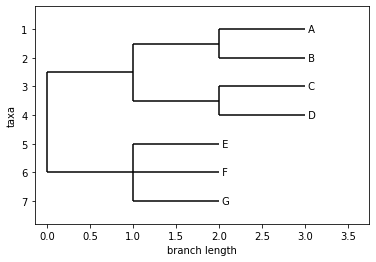

In [36]:
from Bio import Phylo 
tree = Phylo.read("/content/simple.dnd", "newick")
print(tree)
Phylo.draw_ascii(tree)
tree.rooted = True 
Phylo.draw(tree)

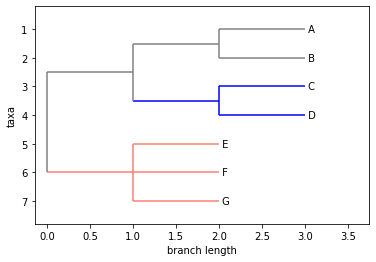

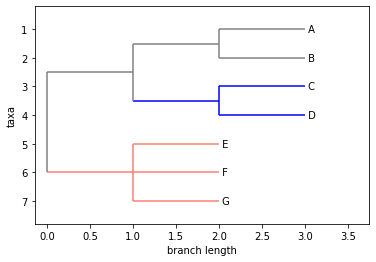

In [37]:
from Bio.Phylo.PhyloXML import Phylogeny 
tree = tree.as_phyloxml() 
tree = Phylogeny.from_tree(tree)
tree.root.color = (128, 128, 128) 
mrca = tree.common_ancestor({"name": "E"}, {"name": "F"}) 
mrca.color = "salmon" 
tree.clade[0, 1].color = "blue" 
Phylo.draw(tree, branch_labels=lambda c: c.branch_length) 
Phylo.draw(tree)